# Recurrent Neural Network

## Part 1 - Data Preprocessing

### Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from tensorflow.keras import callbacks  # type: ignore
from tensorflow.keras.models import Sequential  # type: ignore
from tensorflow.keras.layers import Dense, LSTM, Dropout  # type: ignore

2025-05-20 19:31:21.683863: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1747758681.701570    6015 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1747758681.706964    6015 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1747758681.722075    6015 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1747758681.722096    6015 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1747758681.722097    6015 computation_placer.cc:177] computation placer alr

### Importing the training set

In [2]:
dataset_train = pd.read_csv("Google_Stock_Price_Train.csv")
training_set = dataset_train.iloc[:, 1:2].values
last_index = len(training_set)

### Feature Scaling

In [3]:
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler(feature_range=(0, 1))
training_set_scaled = sc.fit_transform(training_set)

### Creating a data structure with 60 timesteps and 1 output

In [4]:
X_train = []
y_train = []

for i in range(60, last_index):
    X_train.append(training_set_scaled[i - 60 : i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

### Reshaping

In [5]:
X_train = np.reshape(
    X_train, (X_train.shape[0], X_train.shape[1], 1)
)  # number of lines (number of stock prices) / number of steps / how many indicator

## Part 2 - Building and Training the RNN

### Custom callback to print device information after each epoch

In [6]:
class DeviceCallback(callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        # Checking the device details
        devices = tf.config.list_logical_devices("GPU")
        if devices:
            device_name = devices[0].name
            print(f"Epoch {epoch + 1} finished using: {device_name} (GPU)")
        else:
            print(f"Epoch {epoch + 1} finished using: CPU")

### Initialising the RNN

In [7]:
regressor = Sequential()

### Adding the first LSTM layer and some Dropout regularisation

In [8]:
regressor.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

I0000 00:00:1747758684.925151    6015 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 14215 MB memory:  -> device: 0, name: Quadro RTX 5000 with Max-Q Design, pci bus id: 0000:01:00.0, compute capability: 7.5
/home/omar/miniconda/envs/.tf219/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


### Adding a second LSTM layer and some Dropout regularisation

In [9]:
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))

### Adding a third LSTM layer and some Dropout regularisation

In [10]:
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))

### Adding a fourth LSTM layer and some Dropout regularisation

In [11]:
regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))

### Adding the output layer

In [12]:
regressor.add(Dense(units=1))

### Compiling the RNN

In [13]:
regressor.compile(optimizer="adam", loss="mean_squared_error")

### Fitting the RNN to the Training set

In [14]:
regressor.fit(X_train, y_train, batch_size=32, epochs=100, callbacks=[DeviceCallback()])

Epoch 1/100


I0000 00:00:1747758688.486258    6149 cuda_dnn.cc:529] Loaded cuDNN version 90300


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step - loss: 0.0999Epoch 1 finished using: /device:GPU:0 (GPU)
38/38 ━━━━━━━━━━━━━━━━━━━━ 10s 177ms/step - loss: 0.0985
Epoch 2/100
37/38 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0065Epoch 2 finished using: /device:GPU:0 (GPU)
38/38 ━━━━━━━━━━━━━━━━━━━━ -4s 36ms/step - loss: 0.0065
Epoch 3/100
37/38 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0064Epoch 3 finished using: /device:GPU:0 (GPU)
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0064
Epoch 4/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.0061Epoch 4 finished using: /device:GPU:0 (GPU)
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - loss: 0.0061
Epoch 5/100
26/38 ━━━━━━━━━━━━━━━━━━━━ 2s 249ms/step - loss: 0.0060Epoch 5 finished using: /device:GPU:0 (GPU)
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0060 
Epoch 6/100
37/38 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.0059Epoch 6 finished using: /device:GPU:0 (GPU)
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - loss: 0.0059
Epoch 7/100
37/3

## Part 3 - Making the predictions and visualising the results

### Getting the real stock price of 2017

In [15]:
dataset_test = pd.read_csv("Google_Stock_Price_Test.csv")
real_stock_price = dataset_test.iloc[:, 1:2].values

### Getting the predicted stock price of 2017

#### Step 1: Combine training and test data for 'Open' prices

In [16]:
# We are using both the training and test 'Open' prices together so we can look back at the last 60 days of data.
dataset_total = pd.concat(
    (dataset_train["Open"], dataset_test["Open"]), axis=0
)  # Combines datasets vertically, stacking rows

#### Step 2: Select recent data including the last 60 days before the test period

In [17]:
# We need the last 'len(dataset_test) + 60' rows of data, which means the test period + 60 days before it.
# This way, we have enough data to look back 60 days when we start predicting in the test period.
inputs = dataset_total[
    len(dataset_total) - len(dataset_test) - 60 :
].values  # Extracts values as a NumPy array for easy processing

#### Step 3: Reshape the data to the required format and scale it to 0-1

In [18]:
#  - Reshape to make sure it has one column (as expected by the scaler).
#  - Scaling the data is necessary because the model was trained on scaled data (0-1 range).
inputs = inputs.reshape(-1, 1)  # Reshapes data to a single column format
inputs = sc.transform(
    inputs
)  # Scales values between 0 and 1 using the same scaler as the training set

#### Step 4: Create test inputs for each day by looking back at the last 60 days

In [19]:
#  - We create an empty list, X_test, which will store 60-day sequences.
#  - For each day in the test set, we look back at the previous 60 days and use those as inputs.
X_test = []
for i in range(60, 80):  # Loop through each test day (from day 60 to day 80)
    X_test.append(
        inputs[i - 60 : i, 0]
    )  # Appends a 60-day sequence of values for each test day

#### Step 5: Convert X_test to a NumPy array and reshape it to fit the model's requirements

In [20]:
# This step reshapes X_test into a 3D array, which the LSTM model requires (samples, timesteps, features).
X_test = np.array(X_test)  # Converts the list of sequences into a NumPy array
X_test = np.reshape(
    X_test, (X_test.shape[0], X_test.shape[1], 1)
)  # Reshapes to 3D: [samples, timesteps, features]

#### Step 6: Predict stock prices and reverse the scaling to get the original values

In [21]:
#  - We use the model to predict stock prices based on X_test.
#  - After predicting, we reverse the scaling (back from 0-1) to get actual stock prices.
predicted_stock_price = regressor.predict(
    X_test
)  # Model predicts stock prices based on 60-day sequences
predicted_stock_price = sc.inverse_transform(
    predicted_stock_price
)  # Converts predicted values back to original scale

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


### Visualising the results

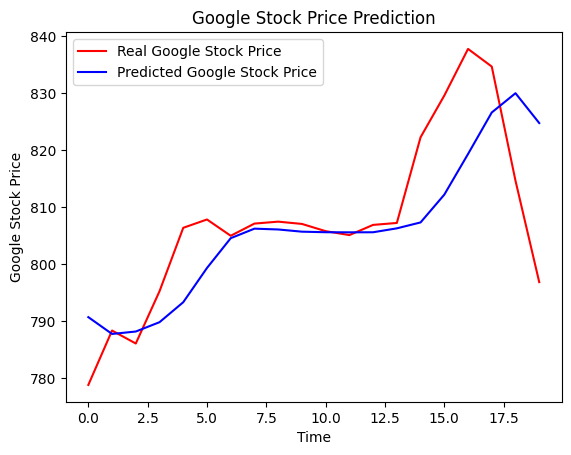

In [22]:
plt.plot(real_stock_price, color="red", label="Real Google Stock Price")
plt.plot(predicted_stock_price, color="blue", label="Predicted Google Stock Price")
plt.title("Google Stock Price Prediction")
plt.xlabel("Time")
plt.ylabel("Google Stock Price")
plt.legend()
plt.show()